In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df=pd.read_csv('diabetes.csv')


In [129]:
df.shape

(768, 9)

In [130]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [131]:
## no missing value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [132]:
## decribe the data to see that scaling is nessesary or not so same value is very learn then need to scaling
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(0, 'Pregnancies')
(1, 'Glucose')
(2, 'BloodPressure')
(3, 'SkinThickness')
(4, 'Insulin')
(5, 'BMI')
(6, 'DiabetesPedigreeFunction')
(7, 'Age')
(8, 'Outcome')


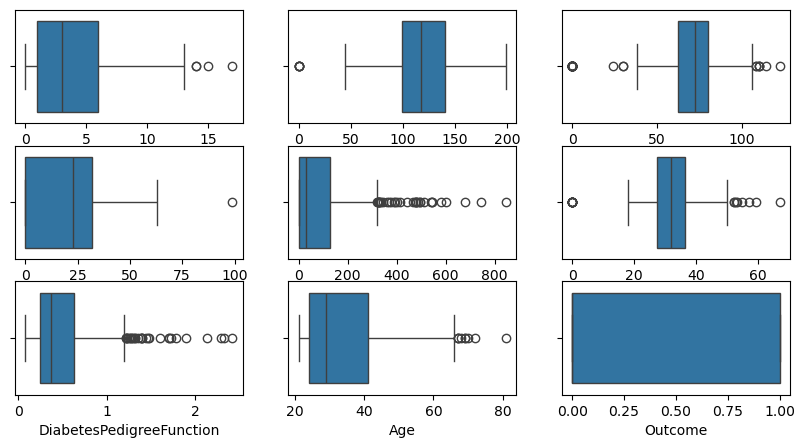

In [133]:
## delecting outlier by usind the visual interpeter usind box plot of histogram
plt.figure(figsize=(10,5))
for i in enumerate(df.columns):
    print(i)
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df,x=i[1])
plt.show()
## show same oulier is present then need to remove so i use the Z-score


In [134]:
## outlier removal
for i in df.columns:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-IQR*1.5
    upper=Q3+IQR*1.5
    df=df[(df[i]>=lower)&(df[i]<=upper)]


In [135]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [136]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [137]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [138]:
X.shape

(636, 8)

In [139]:
y.value_counts()

Outcome
0    439
1    197
Name: count, dtype: int64

In [140]:
## next stape is scaling of data into single scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [141]:
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.681426,1.005403,-0.000696,0.936596,-0.826197,0.256438,0.819791,1.604688
1,-0.857590,-1.168963,-0.532036,0.542370,-0.826197,-0.840893,-0.307223,-0.143041
2,1.297032,2.213384,-0.709149,-1.363054,-0.826197,-1.358207,1.003543,-0.051055
3,-0.857590,-1.030908,-0.532036,0.148145,0.299065,-0.605751,-1.058566,-1.062898
4,0.373623,-0.099037,0.176417,-1.363054,-0.826197,-0.997655,-0.919731,-0.235026


In [149]:
## need to handle the embalance of data 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)
X_res.shape,y_res.shape


((878, 8), (878,))

<Axes: >

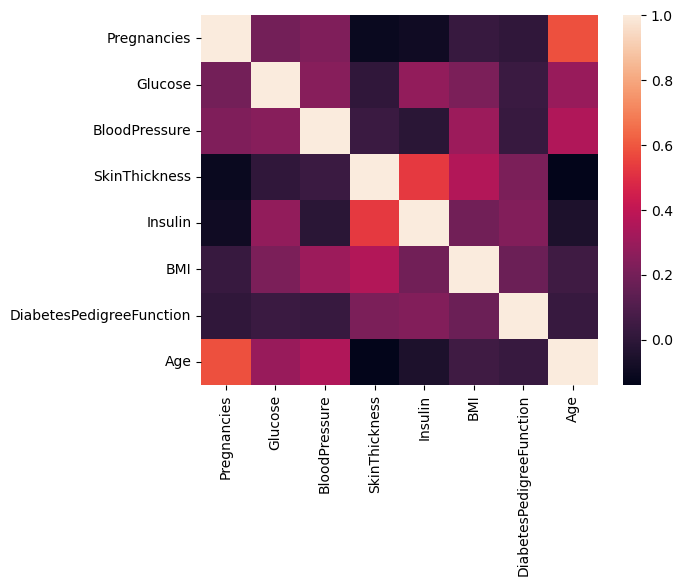

In [148]:
## data is not highly corelated then no need to feature enginnering
sns.heatmap(X_res.corr())

In [150]:
## train test split 
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42)
}

In [191]:
result={}
for name,model in models.items():
    score=cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')
    result[name]=score.mean()
result

{'Logistic Regression': 0.7778824721377913,
 'Random Forest': 0.8148936170212766,
 'KNN': 0.8034751773049645,
 'SVM': 0.8148632218844984}

In [193]:
from sklearn.metrics import accuracy_score

best_model_name = max(result, key=result.get)    # e.g., 'RandomForest'
md = models[best_model_name]                  # get the model instance (first element in list)

md.fit(X_train, y_train)                             # train on training data

y_pred = md.predict(X_test)                       # predict on test data

accuracy = accuracy_score(y_test, y_pred)        # compute accuracy

print(f"Test Accuracy of best model ({best_model_name}): {accuracy:.4f}")


Test Accuracy of best model (Random Forest): 0.8523
